In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.utils import class_weight

In [2]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
#from keras.preprocessing import sequence
#from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(epochs, loss, val_loss):
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(epochs), loss, label='loss')
    plt.plot(np.arange(epochs), val_loss, label='val_loss')
    plt.legend()
    plt.grid(True)

In [4]:
def calculation_classes(y, y_test = None):
    print ('\t\tTRAIN DATA\tTEST DATA')
    print ('Negative\t', np.sum(y==0),'  ',
           round(100*np.sum(y==0)/y.shape[0],2),'%',
           '\t',np.sum(y_test==0),'  ',
           round(100*np.sum(y_test==0)/y_test.shape[0],2),'%'
           '\nPositive\t ', np.sum(y==1),' ',
           round(100*np.sum(y==1)/y.shape[0],2),'%'
           '\t',np.sum(y_test==1),' ',
           round(100*np.sum(y_test==1)/y_test.shape[0],2),'%'
      )

In [5]:
def model(input_shape, Ty):
    i = Input(shape=input_shape, dtype='float32')
    X = LSTM(32, return_sequences=False)(i)
    X = Dense(Ty, activation='sigmoid')(X)
    #X = Activation('softmax')(X)
    model = Model(inputs=[i], outputs=X)
    
    return model
    


# Import data sets

In [62]:
data_train = pd.read_csv('sources/train.csv')
data_test = pd.read_csv('sources/test_v7_v8.csv')

In [63]:
X = data_train.drop(['Y'], axis='columns').values
y = data_train['Y'].values

X_train,X_dev,y_train,y_dev = train_test_split(X, y, test_size=0.2, \
                                               random_state=227, shuffle=True, stratify=y)
X_test = data_test.values
print(len(X_test))


class_weights_train = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y), y)
#print(class_weights_train)
calculation_classes(y, y_dev)

67
		TRAIN DATA	TEST DATA
Negative	 1000    78.8 % 	 200    78.74 %
Positive	  269   21.2 %	 54   21.26 %


In [64]:
ss = StandardScaler()

X = ss.fit_transform(X)
X_train = ss.fit_transform(X_train)
X_dev = ss.transform(X_dev)

X_test = ss.transform(X_test)


In [65]:
X = np.expand_dims(X, axis=2)
X_train = np.expand_dims(X_train, axis=2)
X_dev = np.expand_dims(X_dev, axis=2)

X_test = np.expand_dims(X_test, axis=2)

# NN on train/dev sets

In [52]:
Tx=  6
Ty = 1
epochs = 150
batch_size = 16

In [53]:
LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
logs = LSTM_model.fit(X_train, y_train , epochs=epochs, batch_size=batch_size, shuffle=True,\
               validation_data=(X_dev, y_dev), verbose=0, class_weight=class_weights_train)

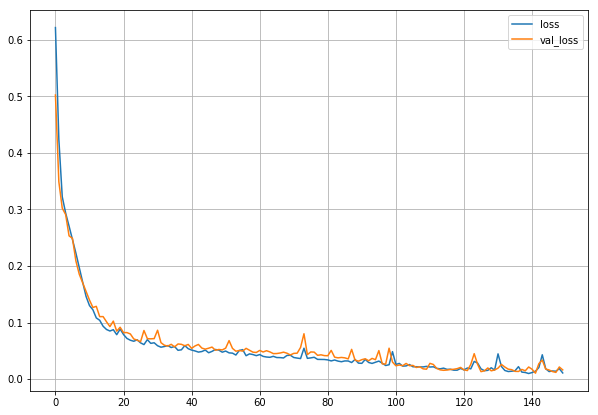

In [54]:
plot_loss(epochs, logs.history.get('loss'), logs.history.get('val_loss'))

# Final fit NN on all train set

In [55]:
Tx=  6
Ty = 1
epochs = 150
batch_size = 16

In [56]:
epochs = 150

LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.fit(X, y , epochs=epochs, batch_size=batch_size, shuffle=True,\
               verbose=0, class_weight=class_weights)
LSTM_model.save_weights('sources/LSTM_sequence_weights.h5')

In [57]:
train_preds = LSTM_model.predict(X)

In [58]:
for i in range(X.shape[0]):
    if train_preds[i] > 0.5:
        print(i)

380
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1

In [66]:
test_preds = LSTM_model.predict(X_test)

In [67]:
for i in range(X_test.shape[0]):
    if test_preds[i] > 0.5:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


In [38]:
LSTM_model = model((Tx,1),Ty)
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.load_weights('sources/LSTM_sequence_weights.h5')

In [44]:
test_preds = LSTM_model.predict(X_test)

for i in range(X_test.shape[0]):
    if test_preds[i] > 0.5:
        print(i)

36
37
38
